In [1]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# 1. Load and Preprocess CIFAR-10 Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Define class names and animal class indices
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
animal_classes = [2, 3, 4, 5, 7]  # Indices for bird, cat, deer, dog, horse

# Filter the dataset to include only animal classes
train_mask = np.isin(train_labels, animal_classes).flatten()
test_mask = np.isin(test_labels, animal_classes).flatten()

train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]

# Map original labels to new labels (0-4)
label_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4}
train_labels = np.array([label_map[label[0]] for label in train_labels])
test_labels = np.array([label_map[label[0]] for label in test_labels])

# Define new class names for animals
class_names_animals = ['bird', 'cat', 'deer', 'dog', 'horse']

# Normalize image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# 2. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# 3. Build the Convolutional Neural Network (CNN) Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 animal classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=15,
                    validation_data=(test_images, test_labels))

# 5. Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# 6. Define the Prediction Function
def predict_species(image_path, model):
    """
    Predicts the species of the uploaded image using the trained model.
    """
    img = Image.open(image_path).convert('RGB')
    img = img.resize((32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)
    predicted_species = class_names_animals[predicted_label]
    confidence = predictions[0][predicted_label] * 100

    return predicted_species, confidence, img

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.3230 - loss: 1.4925 - val_accuracy: 0.5318 - val_loss: 1.1616
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5206 - loss: 1.1802 - val_accuracy: 0.5898 - val_loss: 1.0462
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5704 - loss: 1.0739 - val_accuracy: 0.6260 - val_loss: 0.9554
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.5964 - loss: 1.0148 - val_accuracy: 0.6204 - val_loss: 0.9560
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6201 - loss: 0.9653 - val_accuracy: 0.6330 - val_loss: 0.9559
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.6455 - loss: 0.9177 - val_accuracy: 0.6522 - val_loss: 0.9027
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6522 - loss: 0.8961 - val_accuracy: 0.6804 - val_loss: 0.8431
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6626 - loss: 0.8709 - val_accurac

Please upload an image to predict its species.


Saving Screenshot 2025-06-18 020553.png to Screenshot 2025-06-18 020553.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


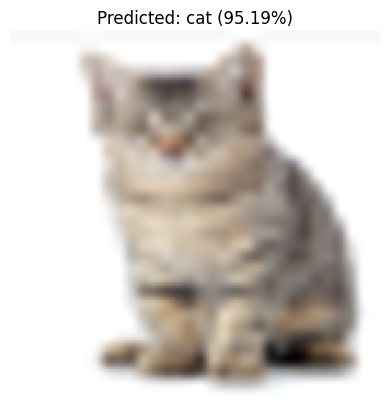


📷 Image: Screenshot 2025-06-18 020553.png
✅ Predicted species: cat
📊 Confidence: 95.19%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


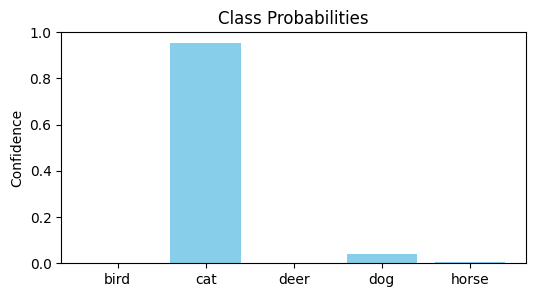

In [8]:
# 7. Upload and Predict
print("Please upload an image to predict its species.")
uploaded = files.upload()

for image_name in uploaded.keys():
    predicted_species, confidence, img = predict_species(image_name, model)

    # Show the resized 32x32 image that was actually used for prediction
    resized_img = img.resize((128, 128))  # upscale just for better visualization
    plt.imshow(resized_img)
    plt.title(f"Predicted: {predicted_species} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"\n📷 Image: {image_name}")
    print(f"✅ Predicted species: {predicted_species}")
    print(f"📊 Confidence: {confidence:.2f}%")

    # Show prediction confidence for all 5 classes
    img_array = image.img_to_array(img.resize((32, 32))) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)

    plt.figure(figsize=(6,3))
    plt.bar(class_names_animals, predictions[0], color='skyblue')
    plt.title("Class Probabilities")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.show()
